## Description

You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.

Merge all the linked-lists into one sorted linked-list and return it.

## Example 1:

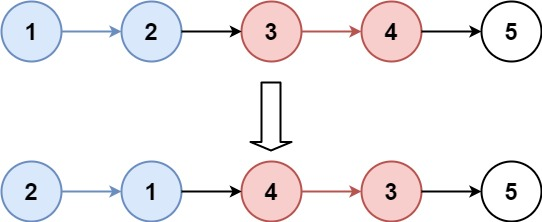

Input: head = [1,2,3,4,5], k = 2

Output: [2,1,4,3,5]

## Example 2:

![reverse_ex2.jpg](reverse_ex2.jpg)

Input: head = [1,2,3,4,5], k = 3

Output: [3,2,1,4,5]

## Constraints:

The number of nodes in the list is n.

1 <= k <= n <= 5000

0 <= Node.val <= 1000

In [300]:
from __future__ import annotations #this was imported so that I could use built in types as generics. 
# Only >3.9 versions of python can use built in types as generics without this import.

In [314]:
# First accepted solution. Written without assistance. This problem wasn't particularly hard either. Just had to think through it
# a bit. 

# Here, I solve the problem at hand utilizing a helper method. This helper method essentially takes in a given node and k pair, 
# stores the node in a list, reverses said list, and moves onto the next node using node.next k number of times, making sure to
# store each of the nodes
# we go over. For example, if k = 2 and the starting linked list looks like 0, 1, 2, 3, 4, the method will store the nodes for 0
# and 1 in a list, reverse said list, and store said list in another container list. At this point, the node that was taken in originally has advanced
# forward by k number of nodes (if k = 2 and node = 0 to start, node = 2 by the end of the method, or if k = 3 and node = 1 to
# start, node = 4 by the end of the method). We return this node along with a True or False, which depends on whether size reached
# 0 or not during the current iteration of the helper method. The reason we want to return True when size does reach 0 and False
# when size doesn't reach 0 is because this indicates to the 'reverseKgroup' method whether or not to continue iterating the
# helper method. We know that if size never reaches 0, we've reached a point in the linked list where we cannot pull anymore k 
# sized tidbits out of it. Thus, it wouldn't make sense to keep running the helper method. At this point, we have a container list
# housing its own lists. These sub-lists contain the reversed, k-sized 'tidbits' we pulled out of the linked list one by one
# using our helper method. Each of these tidbits are already self-contained linked lists. That is, if a tidbit looks like [1, 0],
# (such as the first extractable tidbit in the case where input linked list = [0, 1, 2, 3, 4] and k = 2), the node containing 1
# already has it's next node set to the node containing 0. However, the final node in any tidbit (the node containing 0, in our
# example from the previous sentence) does not point towards any next node. The rest of the reverseKgroup method is dedicated to
# connecting the final nodes in each tidbit (except the final one) to the first node of the subsequent tidbit. As for the final
# node of the final tidbit, we just go ahead and connect it to the last returned node from the helper method. This last returned
# node, due to the way the helper method functions, will always be the first node out of the rest of the nodes left in the linked
# list that did not number enough to become a k sized tidbit. Then, we return the first node in the first sublist in our container
# list, which should be our new head node. 

class Solution:
    def __init__(self):
        self.container = []
    def reversecurrent(self, size, node):
        temp = []
        dummy_node = node
        while size!=0 and node:
            temp.append(node)
            try:
                node = node.next
            except:
                break
            size-=1
        if size!=0:
            return False, dummy_node# we can no longer divide what's left of the linked list into k sized tidbits. We know this
        # because if we were able to keep taking out k sized tidbits, size would == 0 by the time the while loop immediately prior
        # finished running. The loop breaks because node.next stops working at some point within said loop, not because size became
        # equal to zero. 
        temp = temp[::-1]
        for i, y in enumerate(temp):
            try:
                y.next = temp[i+1]
            except:
                break
        self.container.append(temp)
        return True, node
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        while True:
            y, head = self.reversecurrent(k, head)
            if not y:
                break
        for i, y in enumerate(self.container):
            try:
                y[-1].next = self.container[i+1][0]
            except:
                self.container[i][-1].next = head
        return_node = self.container[0][0]
        return return_node

# Time complexity should depend on both the length of the linked list as well as the size of k:

# reversecurrent() time complexity depends on the size of k purely. THe first while loop will execute at most k number of times.
# Its operations are all constant time, so overall the loop is O(k).
# The list reversal will take O(n) where n is the number of items within the list. Since the number of items in the list will always
# be of size k, it is actually O(k) as well. The for loop will execute k-1 times at most, and its operations are constant time as well,
# so it is also O(k). Thus, overall, reversecurrent() method is O(k) + O(k) + O(k) = O(k).

# reverseKGroup() time complexity will depend on number of nodes in the linked list (we will call this n), as well as the size 
# of k. The first while loop will run as many times as k will fit inside n, so n//k times. Each time it is ran, it executes
# reversecurrent() which has a time complexity of O(k). Thus, overall, the while loop has time complexity of O(n//k)*O(k), or
# O(n), where n is the number of nodes in the linked list. The for loop will run l number of times where l is the number of items in
# self.container. Self.container will be populated a total of n//k times, thus the for loop will run n//k number of times. Its
# operations are of constant time as well, thereby making the for loop O(n//k) overall. Thus, reverseKgroup() overall is
# O(n) + O(n//k) ~ O(n) in runtime where n is the number of nodes in the linked list. 

In [2]:
# Second accepted solution. Written with outside assistance. 

# I wanted to complete this particular problem without the usage of the container lists and the python list reversal. In order to
# accomplish this, I basically keep track of the beginning and end of each subsequent k-sized slice of the linked list utilizing
# a helper method (that uses k and a pointer to the beginning of a slice to find the tail end of the slice) and a while loop. 
# Each time the while loop runs, we find the beginning of the next slice (which is also the end of our current slice), 
# update its pointer, reverse the nodes between the pointer to the end of the previous slice (which is also the beginning of our
# current slice) and the pointer to the beginning of the next slice using a nested while loop, then update the pointer to the 
# end of the previous slice to be the end of our current slice (which is also the beginning of the next slice). This will run until
# we have reversed each k groups inside the linked list. The helper method here is quite similar to the mechanism in the helper
# method of our first solution that we used to extract a k-sized tidbit from the linked list
# The explanation above is a lot clearer when you look at the variable names in the solution:

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def findtail(self, node, size):
        while node and size>0:
            node = node.next
            size -=1
        return node
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        dummy_node = ListNode(0, head)
        end_of_prev_slice = dummy_node
        while True:
            kth_position = self.findtail(end_of_prev_slice, k)
            if not kth_position:
                break
            beginning_of_next_slice = kth_position.next
            current, prior = end_of_prev_slice.next, kth_position.next
            while current!=beginning_of_next_slice:
                storage = current.next
                current.next = prior
                prior = current
                current = storage
            storage = end_of_prev_slice.next
            end_of_prev_slice.next = kth_position
            end_of_prev_slice = storage
        return dummy_node.next

In [ ]:
# Code beyond this was written for the purposes of testing my solution. Needs to be modified to adjust for the fact that 
# self.container is now part of the constructor (a.k.a is now an instance attribute instead of a class attribute). Had to change
# container to be an instance attribute as we don't want to keep reusing each instance's leftovers within self.container.

In [302]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [303]:
linked_list1 = [1, 2, 3, 4, 5]

In [304]:
def create_linked_list(input_list):    
    for i, y in enumerate(input_list):
        if i!= 0:
            a.next = ListNode(y)
            a = a.next
        else:
            a = ListNode(y)
            b = a
    return b

In [305]:
test_header = create_linked_list(linked_list1)

In [306]:
temp = test_header
while temp.next:
    temp = temp.next
    print (temp.val)

2
3
4
5


In [307]:
test_node = Solution().reverseKGroup(test_header, 3)

[[<__main__.ListNode object at 0x000001BECE17D4C0>, <__main__.ListNode object at 0x000001BECE17D640>, <__main__.ListNode object at 0x000001BECE17DD00>]]


In [308]:
test_node.val

3

In [309]:
print(test_node.val)
while test_node.next:
    test_node = test_node.next
    print(test_node.val)

3
2
1
4
5
